In [38]:
from data_score import Read_Data

# n = 3
# m = 2
# D = Read_Data('feature_data_1', n)
# names = ['cirr', 'dia', 'leuk']
# use_y = True

# n = 3
# m = 2
# D = Read_Data('feature_data_2', n)
# names = ['bmi', 'dia', 'hepa_fail']
# use_y = True

# n = 4
# m = 3
# D = Read_Data('feature_data_3', n)
# names = ['bmi', 'dia', 'hepa_fail', 'sex']
# use_y = False

n = 4
m = 3
D = Read_Data('feature_data_4', n)
names = ['bmi', 'dia', 'hepa_fail', 'age']
use_y = False

# a few tips to prepare feature data:
    # 1.replace tabular to space
    # 2.use the first line to record the index of features and the number of lines
show_BF = False
onelocal = False


[74. 48. 38. ... 62. 61. 35.]
data about  [ 2. 66. 67.  1.]  is read


In [61]:
from hamiltonian import bf, hamiltonian_para, calculate_Delta_ji, generate_delta
locality = None
# locality = 2

Delta_ji = calculate_Delta_ji(n, m, D)
delta_max_i, delta_cons_ij, delta_trans_ijk = generate_delta(Delta_ji)
delta_norm = 0
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_cons_ij, delta_trans_ijk, delta_norm, locality = locality, use_y = use_y)

In [3]:
# bf(C, h, J, n)

In [62]:
from qannealing import annealing
from qiskit import  transpile
from qiskit_aer import AerSimulator
import heapq
from operator import itemgetter

M = 100
T = 10
lamda = 1
shots = 10000
circ = annealing(n, M, h, J, T, lamda, use_y)
simulator = AerSimulator()
compiled_circuit = transpile(circ, simulator)
job = simulator.run(compiled_circuit, shots = shots)
res = job.result()
counts = res.get_counts(compiled_circuit)
best_counts = dict(heapq.nlargest(10, counts.items(),key=itemgetter(1)))
print(best_counts)

{'111100100011010011': 100, '110101100011010010': 72, '110000100011010011': 66, '111000100011010011': 55, '100000100011010011': 52, '110100100011010010': 49, '011110000110010011': 47, '111111101010011010': 43, '100111100011010010': 43, '000001000111010010': 43}


[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] [1, 1, 0, 0, 0, 0] -1 False True True
[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] [0, 1, 0, 1, 0, 0] -1 False True True
[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] [1, 1, 1, 1, 0, 0] -1 False True True
[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] [1, 1, 1, 0, 0, 0] -1 False True True
[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] [1, 1, 1, 1, 1, 0] -1 False True True
[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] [1, 1, 0, 1, 0, 0] -1 False True True
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] [1, 0, 0, 0, 0, 1] -1 False True True
[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0] [0, 0, 0, 0, 0, 0] -1 False True True
[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] [0, 0, 0, 1, 1, 0] -1 False True True
[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1] [0, 1, 1, 1, 1, 1] -1 False True True


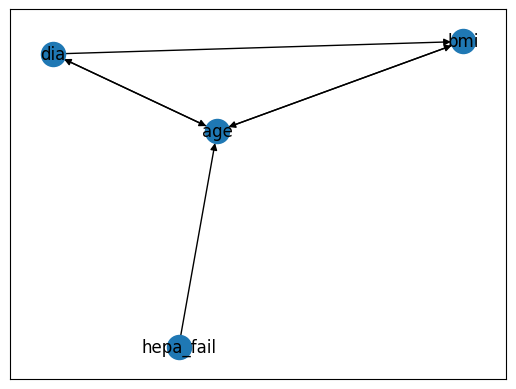

the optimal ans is  [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] [1, 1, 0, 0, 0, 0]
There is mutual connection between two nodes or some r_ij is wrong. 


In [63]:
from analysis_toolkit import res_extractor, res_draw
import numpy as np

d0 = r0 = y0 = is_cons0 = is_dag0 = is_legal0 = G0 = None
for tmp in best_counts:
    d, r, y, is_cons, is_dag, is_legal, G = res_extractor(tmp, n, m, use_y, names)
    print(d, r, y, is_cons, is_dag, is_legal)
    if d0 == None:
        d0, r0, y0, is_cons0, is_dag0, is_legal0, G0 = d, r, y, is_cons, is_dag, is_legal, G
res_draw(d0, r0, y0, is_cons0, is_dag0, is_legal0, G0, use_y)